In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file = '2020MayHousingSales.xlsx'
df = pd.read_excel(file)

## Data Visualizations - Existing Single-Family Home

### 1 - SF BAY AREA : Year to Year Median Sold Price (May-2019 / May-2020)
### 2 - SF BAY AREA : Year to Year Median Sold Price Change % (May-2019 / May-2020)
### 3 - SF BAY AREA : Year to Year % Change in Sales (May-2019 / May-2020)
### 4 - SF BAY AREA : Month to Month Median Sold Price (Apr-2020 / May-2020)
### 5 - SF BAY AREA : Month to Month Median Sold Price Change % (Apr-2020 / May-2020)
### 6 - SF BAY AREA : Month to Month Sales Change %  (Apr-2020 / May-2020)

### 7 - SO CAL AREA : Year to Year Median Sold Price (May-2019 / May-2020)
### 8 - SO CAL AREA : Year to Year Median Sold Price Change % (May-2019 / May-2020)
### 9 - SO CAL AREA : Year to Year % Change in Sales (May-2019 / May-2020)
### 10 - SO CAL AREA : Month to Month Median Sold Price (Apr-2020 / May-2020)
### 11 - SO CAL AREA : Month to Month Median Sold Price Change % (Apr-2020 / May-2020)
### 12 - SO CAL AREA : Month to Month Sales Change %  (Apr-2020 / May-2020)

## SF BAY AREA DATA

### Setting up Pandas DataFrame

In [4]:
dfSF = df.iloc[13:23]
dfSF = dfSF.dropna(axis=1)
dfSF.columns = dfSF.iloc[0]
dfSF = dfSF.drop(dfSF.index[0])

In [5]:
dfSF

13,S.F. Bay Area,2020-05-01 00:00:00,2020-04-03 00:00:00,2019-05-02 00:00:00,Price MTM% Chg,Price YTY% Chg,Sales MTM% Chg,Sales YTY% Chg
14,Alameda,955000,1030000,959000,-0.0728155,-0.00417101,-0.194991,-0.564797
15,Contra Costa,690000,710000,700360,-0.028169,-0.0147924,-0.0640809,-0.526451
16,Marin,1500000,1365000,1400000,0.0989011,0.0714286,0.464286,-0.495902
17,Napa,672500,750000,725000,-0.103333,-0.0724138,-0.184615,-0.53913
18,San Francisco,1627500,1699500,1697500,-0.0423654,-0.0412371,0.0196078,-0.555556
19,San Mateo,1650000,1640000,1766500,0.00609756,-0.0659496,0.194872,-0.445238
20,Santa Clara,1365000,1388890,1335000,-0.0172008,0.0224719,-0.123457,-0.511308
21,Solano,482000,482500,446000,-0.00103627,0.0807175,0.0181159,-0.351039
22,Sonoma,675000,657880,666000,0.026023,0.0135135,-0.146018,-0.540476


In [6]:
dfSF.columns = 'SF Bay Area','2020-05-01','2020-04-03','2019-05-02','Price MTM % Chg','Price YTY % Chg','Sales MTM % Chg','Sales YTY % Chg'

In [7]:
dfSF[['Price MTM % Chg', 'Price YTY % Chg','Sales MTM % Chg', 'Sales YTY % Chg']] = dfSF[['Price MTM % Chg', 'Price YTY % Chg','Sales MTM % Chg', 'Sales YTY % Chg']].applymap("{0:.2f}".format)

In [8]:
dfSF.index = np.arange(1, len(dfSF)+1)

In [9]:
dfSF['Price MTM % Chg'] = pd.to_numeric(dfSF['Price MTM % Chg'])
dfSF['Price YTY % Chg'] = pd.to_numeric(dfSF['Price YTY % Chg'])
dfSF['Sales MTM % Chg'] = pd.to_numeric(dfSF['Sales MTM % Chg'])
dfSF['Sales YTY % Chg'] = pd.to_numeric(dfSF['Sales YTY % Chg'])

dfSF.loc[:,'Price MTM % Chg'] = dfSF['Price MTM % Chg'] * 100
dfSF.loc[:,'Price YTY % Chg'] = dfSF['Price YTY % Chg'] * 100
dfSF.loc[:,'Sales MTM % Chg'] = dfSF['Sales MTM % Chg'] * 100
dfSF.loc[:,'Sales YTY % Chg'] = dfSF['Sales YTY % Chg'] * 100

In [10]:
sfmediansoldprice = dfSF.loc[:,:'Price YTY % Chg']
sfmediansoldsales = dfSF.loc[:, 'Sales MTM % Chg':'Sales YTY % Chg']
sfheader = {'Median Sold Price $ of Existing Single-Family Homes':sfmediansoldprice, 'Number of Existing Single-Family Home Sales': sfmediansoldsales}

In [11]:
dfSFcategory = pd.concat(sfheader.values(), axis=1, keys=sfheader.keys())

In [34]:
dfSFcategorygory

Median Sold Price $ of Existing Single-Family Homes                        \
                                          SF Bay Area 2020-05-01 2020-04-03   
1                                            Alameda      955000    1030000   
2                                       Contra Costa      690000     710000   
3                                              Marin     1500000    1365000   
4                                               Napa      672500     750000   
5                                      San Francisco     1627500    1699500   
6                                          San Mateo     1650000    1640000   
7                                        Santa Clara     1365000    1388890   
8                                             Solano      482000     482500   
9                                             Sonoma      675000     657880   

                                              \
  2019-05-02 Price MTM % Chg Price YTY % Chg   
1     959000            -7.0            -0.0   
2     700360            -3.0            -1.0   
3    1400000            10.0             7.0   
4     725000           -10.0            -7.0   
5    1697500            -4.0            -4.0   
6    1766500             1.0            -7.0   
7    1335000            -2.0             2.0   
8     446000            -0.0             8.0   
9     666000             3.0             1.0   

  Number of Existing Single-Family Home Sales                  
                              Sales MTM % Chg Sales YTY % Chg  
1                                       -19.0           -56.0  
2                                        -6.0           -53.0  
3                                        46.0           -50.0  
4                                       -18.0           -54.0  
5                                         2.0           -56.0  
6                                        19.0           -45.0  
7                                       -12.0           -51.0  
8                                         2.0           -35.0  
9                                       -15.0           -54.0

### 1 - SF BAY AREA : Year to Year Median Sold Price (May-2019 / May-2020)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

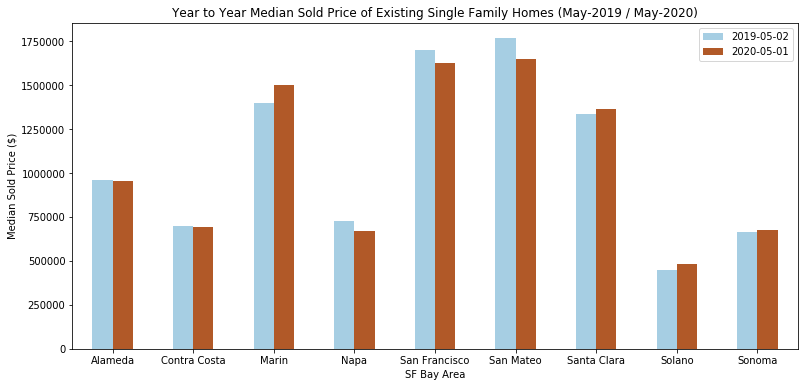

In [13]:
May19Price = dfSF.loc[:,['SF Bay Area','2019-05-02']]
May20Price = dfSF.loc[:,['SF Bay Area','2020-05-01']]
YTYPriceDiff = pd.merge(May19Price,May20Price, how='inner',on=['SF Bay Area']).set_index('SF Bay Area').plot.bar(figsize=(13,6),cmap='Paired')
plt.title('Year to Year Median Sold Price of Existing Single Family Homes (May-2019 / May-2020)')
plt.ylabel('Median Sold Price ($)')
plt.xlabel('SF Bay Area')
plt.xticks(rotation='horizontal')

### 2 - SF BAY AREA : Year to Year Median Sold Price Change % (May-2019 / May-2020)

Text(0.5, 0, 'SF Bay Area')

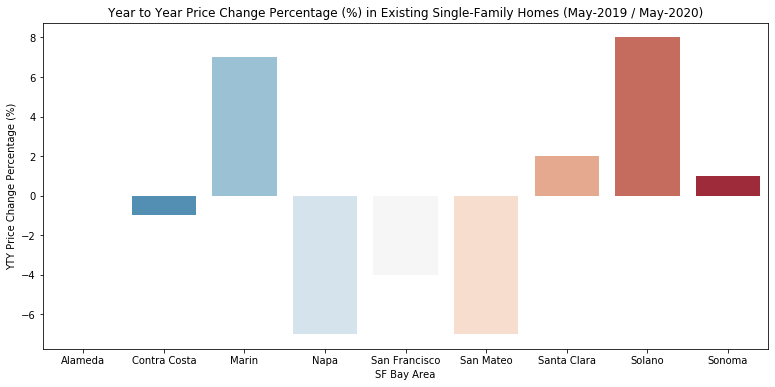

In [14]:
dfSF[['Price YTY % Chg']] = dfSF[['Price YTY % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
sns.barplot(x='SF Bay Area',y='Price YTY % Chg', data=dfSF, palette="RdBu_r")
plt.title('Year to Year Price Change Percentage (%) in Existing Single-Family Homes (May-2019 / May-2020)')
plt.ylabel('YTY Price Change Percentage (%)')
plt.xlabel('SF Bay Area')

### 3 - SF BAY AREA : Year to Year % Change in Sales (May-2019 / May-2020)

Text(0.5, 0, 'SF Bay Area')

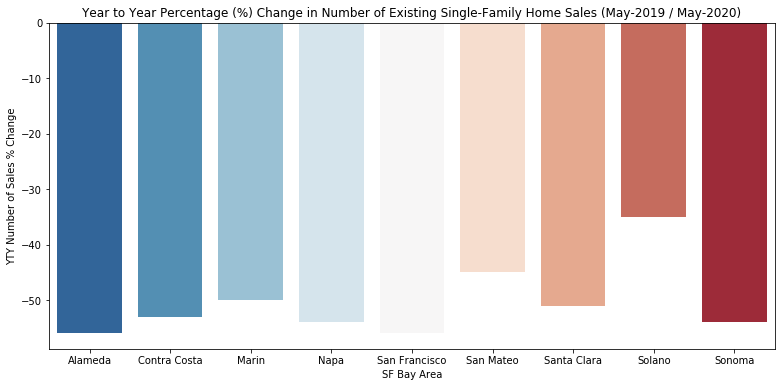

In [15]:
dfSF[['Sales YTY % Chg']] = dfSF[['Sales YTY % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
sns.barplot(x='SF Bay Area',y='Sales YTY % Chg', data=dfSF,palette="RdBu_r")
plt.title('Year to Year Percentage (%) Change in Number of Existing Single-Family Home Sales (May-2019 / May-2020)')
plt.ylabel('YTY Number of Sales % Change')
plt.xlabel('SF Bay Area')

### 4 - SF BAY AREA : Month to Month Median Sold Price (Apr-2020 / May-2020)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

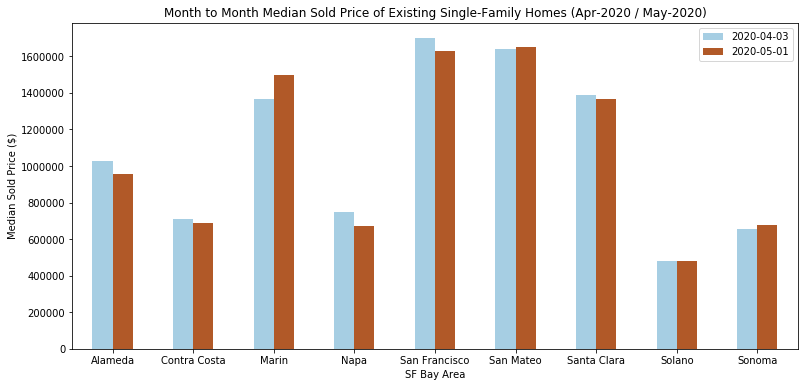

In [16]:
Apr20Price = dfSF.loc[:,['SF Bay Area','2020-04-03']]
May20Price = dfSF.loc[:,['SF Bay Area','2020-05-01']]
MTMPriceDiff = pd.merge(Apr20Price,May20Price, how='inner',on=['SF Bay Area']).set_index('SF Bay Area').plot.bar(figsize=(13,6),cmap='Paired')
plt.ylabel('Median Sold Price ($)')
plt.title('Month to Month Median Sold Price of Existing Single-Family Homes (Apr-2020 / May-2020)')
plt.xlabel('SF Bay Area')
plt.xticks(rotation='horizontal')

### 5 - SF BAY AREA : Month to Month Median Sold Price Change % (Apr-2020 / May-2020)

Text(0.5, 0, 'SF Bay Area')

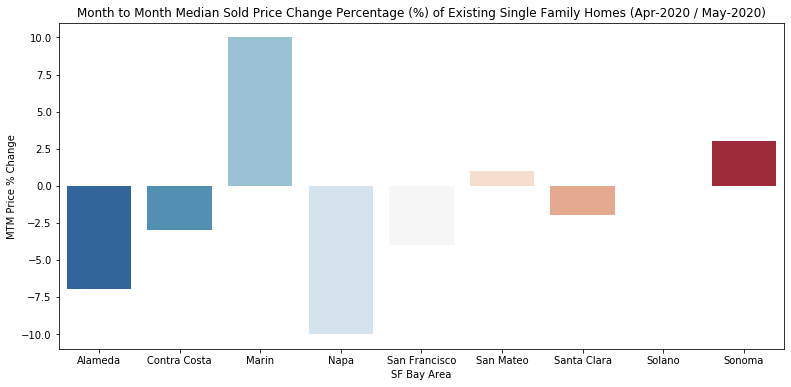

In [17]:
dfSF[['Price MTM % Chg']] = dfSF[['Price MTM % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
sns.barplot(x='SF Bay Area',y='Price MTM % Chg', data=dfSF,palette="RdBu_r")
plt.ylabel('MTM Price % Change')
plt.title('Month to Month Median Sold Price Change Percentage (%) of Existing Single Family Homes (Apr-2020 / May-2020)')
plt.xlabel('SF Bay Area')

### 6 - SF BAY AREA : Month to Month % Change Sales (Apr-2020 / May-2020)

Text(0.5, 0, 'SF Bay Area')

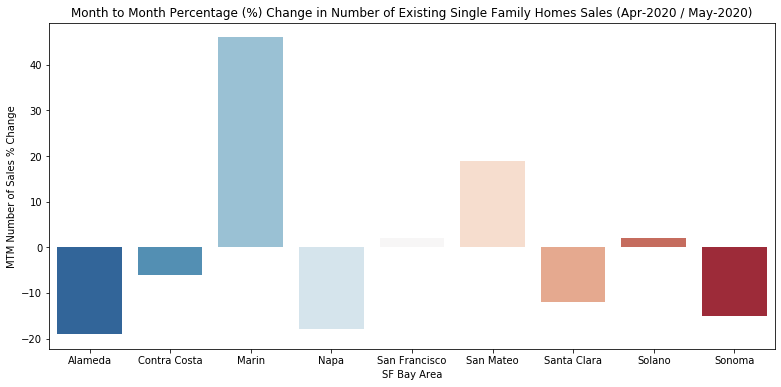

In [18]:
dfSF[['Sales MTM % Chg']] = dfSF[['Sales MTM % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
MTMperc = sns.barplot(x='SF Bay Area',y='Sales MTM % Chg', data=dfSF, palette="RdBu_r")
plt.title('Month to Month Percentage (%) Change in Number of Existing Single Family Homes Sales (Apr-2020 / May-2020)')
plt.ylabel('MTM Number of Sales % Change')
plt.xlabel('SF Bay Area')

## SOUTHERN CALIFORNIA DATA

### Setting up Pandas DataFrame

In [19]:
dfSC = df[23:30]
dfSC = dfSC.dropna(axis=1)
dfSC.columns = dfSC.iloc[0]
dfSC = dfSC.drop(dfSC.index[0])

In [20]:
dfSC

23,Southern California,2020-05-01 00:00:00,2020-04-03 00:00:00,2019-05-02 00:00:00,Price MTM% Chg,Price YTY% Chg,Sales MTM% Chg,Sales YTY% Chg
24,Los Angeles,546930,565170,539480,-0.0322735,0.0138096,-0.108557,-0.475056
25,Orange,834550,861000,845000,-0.0307201,-0.0123669,-0.190574,-0.532821
26,Riverside,434480,435000,420000,-0.0011954,0.0344762,-0.0433547,-0.430385
27,San Bernardino,320000,325000,315000,-0.0153846,0.015873,-0.126568,-0.375713
28,San Diego,655000,671000,650000,-0.023845,0.00769231,-0.146293,-0.422503
29,Ventura,681250,675000,659500,0.00925926,0.0329795,-0.284848,-0.520325


In [21]:
dfSC.columns = 'So Cal Area','2020-05-01','2020-04-03','2019-05-02','Price MTM % Chg','Price YTY % Chg','Sales MTM % Chg','Sales YTY % Chg'

In [22]:
dfSC[['Price MTM % Chg', 'Price YTY % Chg','Sales MTM % Chg', 'Sales YTY % Chg']] = dfSC[['Price MTM % Chg', 'Price YTY % Chg','Sales MTM % Chg', 'Sales YTY % Chg']].applymap("{0:.2f}".format)

In [23]:
dfSC.index = np.arange(1, len(dfSC)+1)

In [24]:
dfSC['Price MTM % Chg'] = pd.to_numeric(dfSC['Price MTM % Chg'])
dfSC['Price YTY % Chg'] = pd.to_numeric(dfSC['Price YTY % Chg'])
dfSC['Sales MTM % Chg'] = pd.to_numeric(dfSC['Sales MTM % Chg'])
dfSC['Sales YTY % Chg'] = pd.to_numeric(dfSC['Sales YTY % Chg'])

dfSC.loc[:,'Price MTM % Chg'] = dfSC['Price MTM % Chg'] * 100
dfSC.loc[:,'Price YTY % Chg'] = dfSC['Price YTY % Chg'] * 100
dfSC.loc[:,'Sales MTM % Chg'] = dfSC['Sales MTM % Chg'] * 100
dfSC.loc[:,'Sales YTY % Chg'] = dfSC['Sales YTY % Chg'] * 100

In [25]:
scmediansoldprice = dfSC.loc[:,:'Price YTY % Chg']
scmediansoldsales = dfSC.loc[:, 'Sales MTM % Chg':'Sales YTY % Chg']
scheader = {'Median Sold Price $ of Existing Single-Family Homes':scmediansoldprice, 'Number of Existing Single-Family Home Sales': scmediansoldsales}

In [26]:
dfSCcategory = pd.concat(scheader.values(), axis=1, keys=scheader.keys())

In [27]:
dfSCcategory

Median Sold Price $ of Existing Single-Family Homes                        \
                                          So Cal Area 2020-05-01 2020-04-03   
1                                        Los Angeles      546930     565170   
2                                            Orange       834550     861000   
3                                         Riverside       434480     435000   
4                                     San Bernardino      320000     325000   
5                                          San Diego      655000     671000   
6                                            Ventura      681250     675000   

                                              \
  2019-05-02 Price MTM % Chg Price YTY % Chg   
1     539480            -3.0             1.0   
2     845000            -3.0            -1.0   
3     420000            -0.0             3.0   
4     315000            -2.0             2.0   
5     650000            -2.0             1.0   
6     659500             1.0             3.0   

  Number of Existing Single-Family Home Sales                  
                              Sales MTM % Chg Sales YTY % Chg  
1                                       -11.0           -48.0  
2                                       -19.0           -53.0  
3                                        -4.0           -43.0  
4                                       -13.0           -38.0  
5                                       -15.0           -42.0  
6                                       -28.0           -52.0

### 7 - SO CAL AREA : Year to Year Median Sold Price (May-2019 / May-2020)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

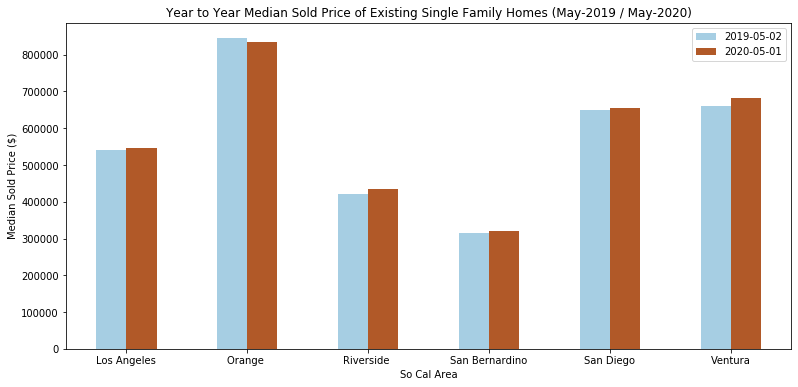

In [28]:
May19Price = dfSC.loc[:,['So Cal Area','2019-05-02']]
May20Price = dfSC.loc[:,['So Cal Area','2020-05-01']]
YTYPriceDiff = pd.merge(May19Price,May20Price, how='inner',on=['So Cal Area']).set_index('So Cal Area').plot.bar(figsize=(13,6),cmap='Paired')
plt.title('Year to Year Median Sold Price of Existing Single Family Homes (May-2019 / May-2020)')
plt.ylabel('Median Sold Price ($)')
plt.xlabel('So Cal Area')
plt.xticks(rotation='horizontal')

### 8 - SO CAL AREA : Year to Year Median Sold Price Change % (May-2019 / May-2020)

Text(0.5, 0, 'So Cal Area')

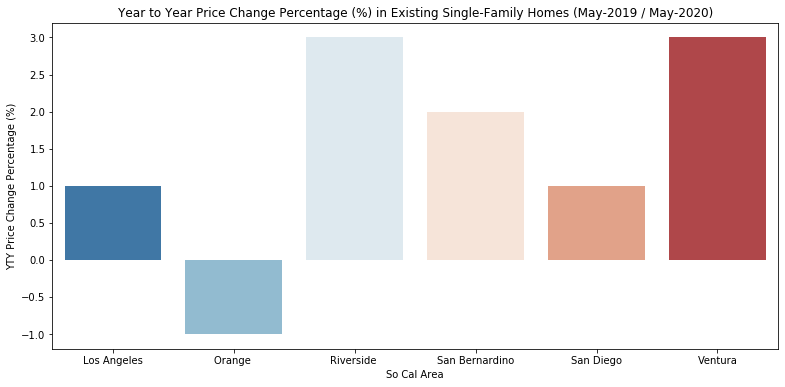

In [29]:
dfSC[['Price YTY % Chg']] = dfSC[['Price YTY % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
sns.barplot(x='So Cal Area',y='Price YTY % Chg', data=dfSC, palette="RdBu_r")
plt.title('Year to Year Price Change Percentage (%) in Existing Single-Family Homes (May-2019 / May-2020)')
plt.ylabel('YTY Price Change Percentage (%)')
plt.xlabel('So Cal Area')

### 9 - SO CAL AREA : Year to Year % Change in Sales (May-2019 / May-2020)

Text(0.5, 0, 'So Cal Area')

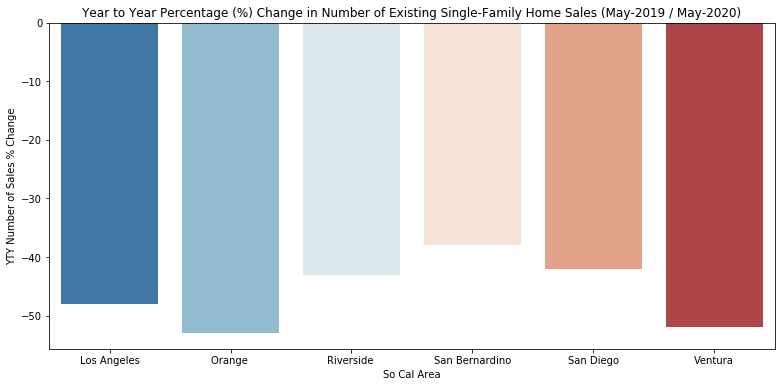

In [30]:
dfSC[['Sales YTY % Chg']] = dfSC[['Sales YTY % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
sns.barplot(x='So Cal Area',y='Sales YTY % Chg', data=dfSC,palette="RdBu_r")
plt.title('Year to Year Percentage (%) Change in Number of Existing Single-Family Home Sales (May-2019 / May-2020)')
plt.ylabel('YTY Number of Sales % Change')
plt.xlabel('So Cal Area')

### 10 - SO CAL AREA : Month to Month Median Sold Price (Apr-2020 / May-2020)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

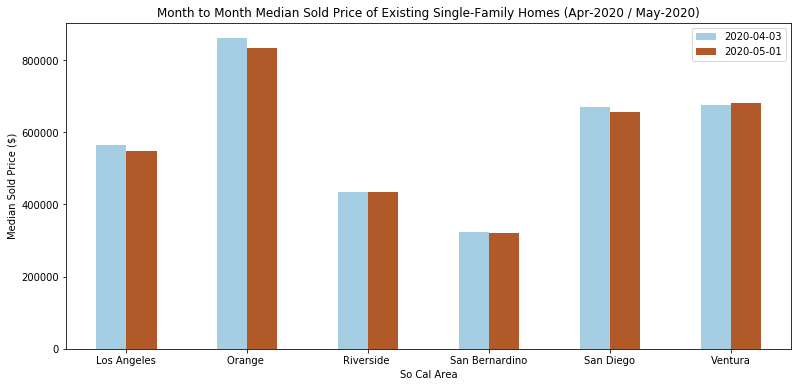

In [31]:
Apr20Price = dfSC.loc[:,['So Cal Area','2020-04-03']]
May20Price = dfSC.loc[:,['So Cal Area','2020-05-01']]
MTMPriceDiff = pd.merge(Apr20Price,May20Price, how='inner',on=['So Cal Area']).set_index('So Cal Area').plot.bar(figsize=(13,6),cmap='Paired')
plt.ylabel('Median Sold Price ($)')
plt.title('Month to Month Median Sold Price of Existing Single-Family Homes (Apr-2020 / May-2020)')
plt.xlabel('So Cal Area')
plt.xticks(rotation='horizontal')

### 11 - SO CAL AREA : Month to Month Median Sold Price Change % (Apr-2020 / May-2020)

Text(0.5, 0, 'So Cal Area')

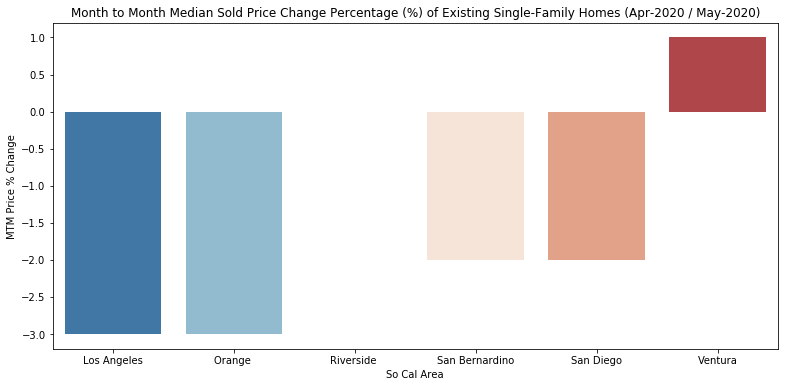

In [32]:
dfSC[['Price MTM % Chg']] = dfSC[['Price MTM % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
sns.barplot(x='So Cal Area',y='Price MTM % Chg', data=dfSC,palette="RdBu_r")
plt.ylabel('MTM Price % Change')
plt.title('Month to Month Median Sold Price Change Percentage (%) of Existing Single-Family Homes (Apr-2020 / May-2020)')
plt.xlabel('So Cal Area')

### 12 - SO CAL AREA : Month to Month Sales Change %  (Apr-2020 / May-2020)

Text(0.5, 0, 'So Cal Area')

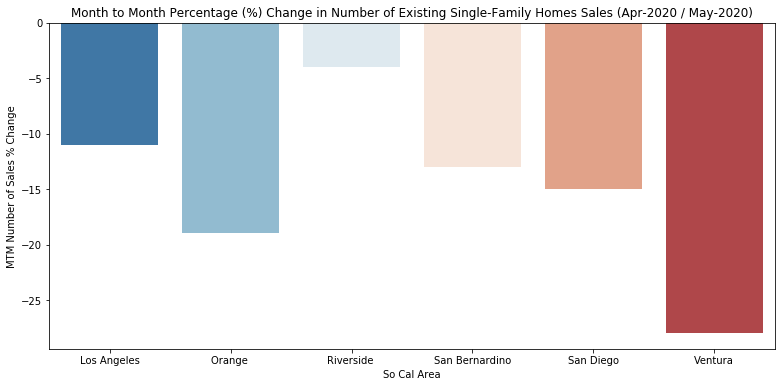

In [33]:
dfSC[['Sales MTM % Chg']] = dfSC[['Sales MTM % Chg']].astype(float)
fig = plt.figure(figsize=(13,6))
MTMperc = sns.barplot(x='So Cal Area',y='Sales MTM % Chg', data=dfSC, palette="RdBu_r")
plt.title('Month to Month Percentage (%) Change in Number of Existing Single-Family Homes Sales (Apr-2020 / May-2020)')
plt.ylabel('MTM Number of Sales % Change')
plt.xlabel('So Cal Area')